In [52]:
#Yuki's Code

In [53]:
import json
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn
from statsmodels.tsa.stattools import coint

In [54]:
filename='data/utilities.csv'
df = pd.read_csv(filename, index_col = 0)
df.head()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,LLY,Eli Lilly and Company,544.45,-5.31,-0.97%,2.177M,2.797M,516.844B,75.62,NaN
1,UNH,UnitedHealth Group Incorporated,510.10,6.37,+1.26%,2.919M,3.225M,472.508B,22.83,NaN
2,NVO,Novo Nordisk A/S,91.52,-0.18,-0.20%,4.265M,3.643M,410.542B,43.58,NaN
3,NONOF,Novo Nordisk A/S,91.65,0.35,+0.38%,5300,53915,410.542B,43.44,NaN
4,JNJ,Johnson & Johnson,156.88,-0.23,-0.15%,7.855M,22.752M,378.322B,31.82,NaN


In [55]:
df.shape

(100, 10)

In [56]:
def convert_volume(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6  # Convert to millions
    elif 'k' in value:
        return float(value.replace('k', '')) * 1e3  # Convert to thousands
    else:
        return float(value)  # No conversion needed

# Apply the conversion function to the 'Volume' column
df['Avg Vol (3 month)'] = df['Avg Vol (3 month)'].apply(convert_volume)

In [57]:
 # Define a volume cap
volume_cap = 1000000

df['Avg Vol (3 month)'] = pd.to_numeric(df['Avg Vol (3 month)'], errors='coerce')
df['Price (Intraday)'] = pd.to_numeric(df['Price (Intraday)'], errors='coerce')

df = df[['Symbol','Avg Vol (3 month)','Price (Intraday)']].sort_values(by='Avg Vol (3 month)', ascending=False)

high_volume = df["Avg Vol (3 month)"]>volume_cap
df_h = df[high_volume]
tickers = df_h.Symbol.tolist()
tickers

['PFE',
 'JNJ',
 'BMY',
 'CVS',
 'BSX',
 'MRK',
 'GILD',
 'AZN',
 'MDT',
 'ABBV',
 'ABT',
 'HLN',
 'MRNA',
 'DXCM',
 'NVO',
 'CNC',
 'GSK',
 'EW',
 'UNH',
 'GEHC',
 'LLY',
 'DHR',
 'AMGN',
 'HZNP',
 'TAK',
 'CAH',
 'A',
 'ISRG',
 'ZTS',
 'COR',
 'ZBH',
 'ILMN',
 'RHHBY',
 'TMO',
 'RMD',
 'CI',
 'NVS',
 'SYK',
 'HUM',
 'HCA',
 'BDX',
 'SNY',
 'SGEN',
 'ELV',
 'BIIB']

In [58]:
#period = '1y' #valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
#interval = '1d' #valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
#df = yf.download(tickers, period=period, interval=interval)["Close"]


# Enable to use start & end dates:
start = datetime.date.today() - datetime.timedelta(days=430)
end = datetime.date.today() - datetime.timedelta(days=60)

df = yf.download(tickers, start, end)["Close"]

df.info()

[*********************100%%**********************]  45 of 45 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2022-07-26 to 2023-07-28
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       254 non-null    float64
 1   ABBV    254 non-null    float64
 2   ABT     254 non-null    float64
 3   AMGN    254 non-null    float64
 4   AZN     254 non-null    float64
 5   BDX     254 non-null    float64
 6   BIIB    254 non-null    float64
 7   BMY     254 non-null    float64
 8   BSX     254 non-null    float64
 9   CAH     254 non-null    float64
 10  CI      254 non-null    float64
 11  CNC     254 non-null    float64
 12  COR     254 non-null    float64
 13  CVS     254 non-null    float64
 14  DHR     254 non-null    float64
 15  DXCM    254 non-null    float64
 16  ELV     254 non-null    float64
 17  EW      254 non-null    float64
 18  GEHC    154 non-null    float64
 19  GILD    254 non-null   

In [59]:
df.head()

,A,ABBV,ABT,AMGN,AZN,BDX,BIIB,BMY,BSX,CAH,...,RHHBY,RMD,SGEN,SNY,SYK,TAK,TMO,UNH,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-26,125.169998,150.869995,109.089996,251.139999,66.720001,244.149994,210.850006,73.629997,37.959999,57.799999,...,42.930000,238.160004,177.509995,50.349998,204.410004,14.55,573.270020,531.590027,108.019997,176.380005
2022-07-27,127.709999,151.149994,109.989998,251.720001,67.489998,244.339996,212.919998,74.809998,40.310001,58.110001,...,42.639999,240.160004,176.800003,50.919998,211.800003,14.69,581.929993,534.609985,111.110001,177.470001
2022-07-28,131.110001,149.750000,110.360001,249.750000,66.720001,243.910004,214.199997,74.699997,41.160000,58.880001,...,42.410000,243.070007,177.429993,50.919998,219.029999,14.81,597.640015,541.489990,110.779999,182.270004
2022-07-29,134.100006,143.509995,108.839996,247.470001,66.230003,244.309998,215.059998,73.779999,41.049999,59.560001,...,41.470001,240.520004,179.979996,49.700001,214.750000,14.61,598.409973,542.340027,110.389999,182.550003
2022-08-01,133.429993,140.220001,109.519997,245.639999,65.650002,244.770004,209.259995,73.620003,41.049999,60.320000,...,41.299999,239.199997,175.470001,48.900002,213.490005,14.32,589.549988,535.380005,109.760002,179.740005


In [60]:
df = df.dropna(axis=0, how='all') # check if necessary
df = df.dropna(axis=1) # check if necessary
new_tickers = df.columns.tolist()
print(f"we have {len(new_tickers)} tickers left")
file_name = "utilities_close_prices.pkl"
df.to_pickle(file_name)
df.info()

we have 44 tickers left
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2022-07-26 to 2023-07-28
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       254 non-null    float64
 1   ABBV    254 non-null    float64
 2   ABT     254 non-null    float64
 3   AMGN    254 non-null    float64
 4   AZN     254 non-null    float64
 5   BDX     254 non-null    float64
 6   BIIB    254 non-null    float64
 7   BMY     254 non-null    float64
 8   BSX     254 non-null    float64
 9   CAH     254 non-null    float64
 10  CI      254 non-null    float64
 11  CNC     254 non-null    float64
 12  COR     254 non-null    float64
 13  CVS     254 non-null    float64
 14  DHR     254 non-null    float64
 15  DXCM    254 non-null    float64
 16  ELV     254 non-null    float64
 17  EW      254 non-null    float64
 18  GILD    254 non-null    float64
 19  GSK     254 non-null    float64
 20  HCA     254 non-null    float64
 

In [61]:
# let's define a function to loop through the tickers and do a cointegration test for each combination
def cointegration_test(data, p_value=0.05):
    n = data.shape[1]
    # create matrix to be filled later
    stats = np.zeros((n, n))
    pvalues = np.ones((n, n))
    keys = data.keys() # get the info axis, returns columns if object is a dataframe
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            test_stat = result[0]
            pvalue = result[1]
            stats[i, j] = test_stat
            pvalues[i, j] = pvalue

            if pvalue < p_value: # pick only statistically significant ones
                pairs.append((keys[i], keys[j]))

    return stats, pvalues, pairs

[('A', 'MRNA'), ('AMGN', 'ELV'), ('BIIB', 'DHR'), ('BSX', 'CVS'), ('BSX', 'HCA'), ('BSX', 'HLN'), ('BSX', 'NVO'), ('BSX', 'NVS'), ('BSX', 'SNY'), ('BSX', 'SYK'), ('BSX', 'ZBH'), ('CAH', 'COR'), ('CAH', 'ISRG'), ('CAH', 'LLY'), ('CNC', 'CVS'), ('CNC', 'DHR'), ('COR', 'ISRG'), ('CVS', 'SYK'), ('DHR', 'DXCM'), ('DHR', 'HCA'), ('DHR', 'NVO'), ('DHR', 'SYK'), ('DXCM', 'SNY'), ('ELV', 'MRNA'), ('ELV', 'PFE'), ('ELV', 'SGEN'), ('ELV', 'ZTS'), ('EW', 'MDT'), ('GSK', 'HCA'), ('GSK', 'HLN'), ('GSK', 'HZNP'), ('GSK', 'ILMN'), ('GSK', 'ISRG'), ('GSK', 'LLY'), ('GSK', 'MRK'), ('GSK', 'NVO'), ('GSK', 'NVS'), ('GSK', 'RHHBY'), ('GSK', 'SGEN'), ('GSK', 'SNY'), ('GSK', 'SYK'), ('GSK', 'TAK'), ('GSK', 'TMO'), ('GSK', 'UNH'), ('GSK', 'ZBH'), ('GSK', 'ZTS'), ('HCA', 'HLN'), ('HCA', 'NVO'), ('HCA', 'SNY'), ('HCA', 'SYK'), ('HCA', 'ZBH'), ('HLN', 'NVO'), ('HLN', 'SNY'), ('HLN', 'SYK'), ('HLN', 'ZBH'), ('HUM', 'ILMN'), ('ILMN', 'ISRG'), ('ILMN', 'JNJ'), ('ILMN', 'LLY'), ('ILMN', 'MDT'), ('ILMN', 'MRK'), ('IL

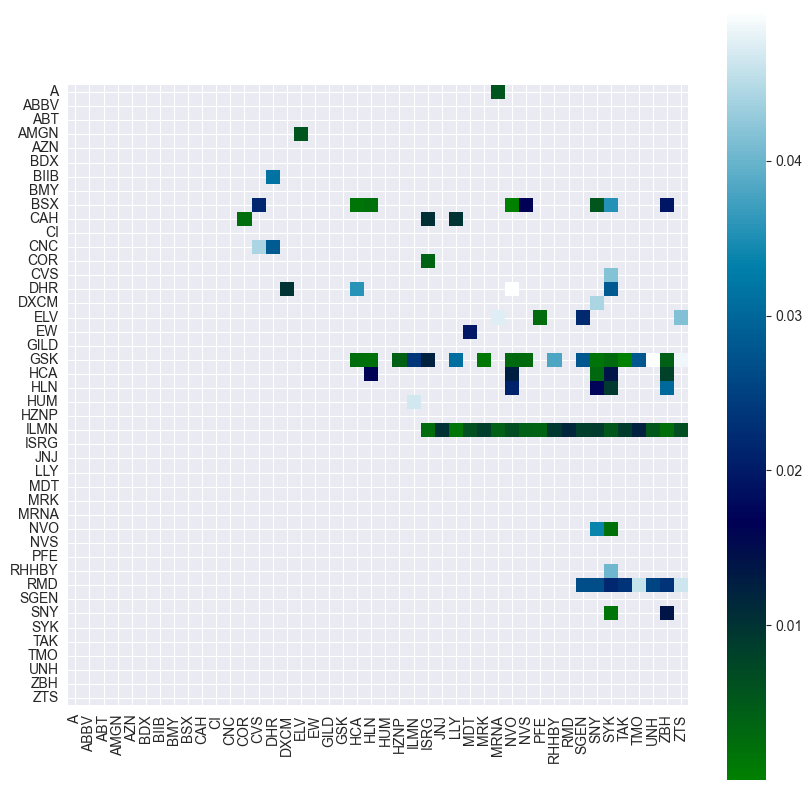

In [62]:
p_value = 0.05  # A p-value less than 0.05 is typically considered to be statistically significant

scores, pvalues, pairs = cointegration_test(df,p_value)

fig, ax = plt.subplots(figsize=(10, 10))
seaborn.heatmap(
    pvalues,
    xticklabels=new_tickers,
    yticklabels=new_tickers,
    cmap="ocean",
    mask=(pvalues >= 0.05),
    square=True
)
print(pairs)

,COR,CVS,DHR,DXCM,ELV,HCA,HLN,HZNP,ILMN,ISRG,JNJ,LLY,MDT,MRK,MRNA,NVO,NVS,PFE,RHHBY,RMD,SGEN,SNY,SYK,TAK,TMO,UNH,ZBH,ZTS
A,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.006,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
AMGN,nan,nan,nan,nan,0.006,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
BIIB,nan,nan,0.032,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
BSX,nan,0.022,nan,nan,nan,0.001,0.002,nan,nan,nan,nan,nan,nan,nan,nan,0.000,0.017,nan,nan,nan,nan,0.005,0.035,nan,nan,nan,0.019,nan
CAH,0.002,nan,nan,nan,nan,nan,nan,nan,nan,0.010,nan,0.010,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CNC,nan,0.044,0.029,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
COR,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.004,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
CVS,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.042,nan,nan,nan,nan,nan
DHR,nan,nan,nan,0.010,nan,0.036,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.050,nan,nan,nan,nan,nan,nan,0.028,nan,nan,nan,nan,nan
DXCM,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.044,nan,nan,nan,nan,nan,nan


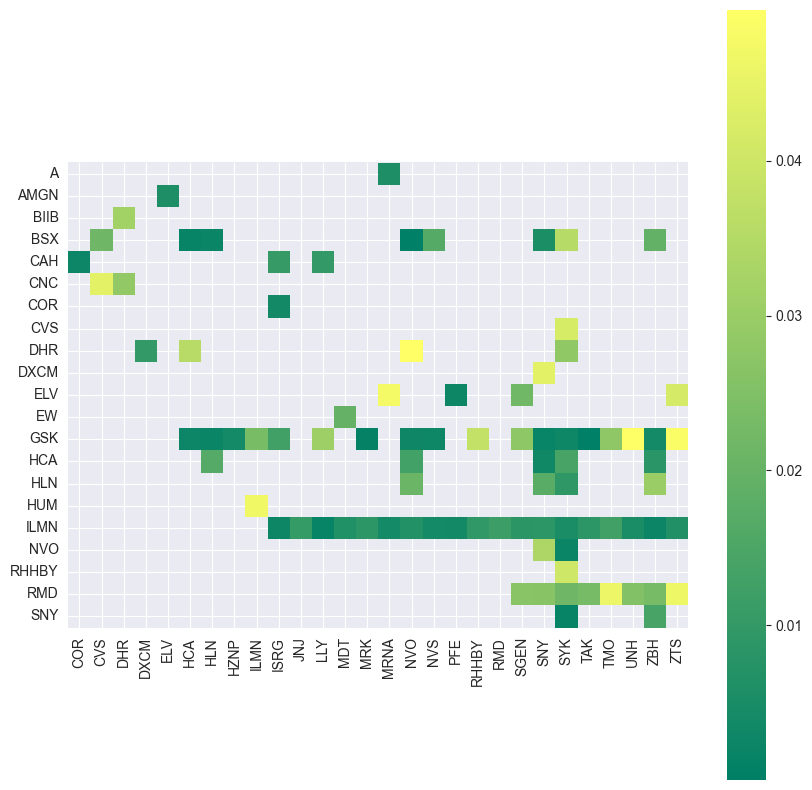

In [63]:
mask_matrix = (pvalues >= 0.05) # possible to increase the level of significance

mask_df = pd.DataFrame(mask_matrix, index= new_tickers, columns = new_tickers)
scores_df = pd.DataFrame(scores, index= new_tickers, columns = new_tickers)
pvalues_df = pd.DataFrame(pvalues, index= new_tickers, columns = new_tickers)

df_f = pvalues_df[~mask_df].dropna(how='all', axis=1)
df_f = df_f.dropna(how='all')

def gold_apply(x):
    color = {True: "background-color: #c78f2e", False: "color : white"}
    is_color = (x > 0).replace(color)
    return is_color


fig, ax = plt.subplots(figsize=(10, 10))
seaborn.heatmap(
    df_f,
    xticklabels=df_f.columns,
    yticklabels=df_f.index,
    cmap="summer",
    square=True
)
df_f.style.format(precision=3) \
    .apply(gold_apply)

In [64]:
x_list = df_f.index.tolist()
y_list = df_f.columns.tolist()

new_pairs_list = [] # list of pairs as tuples (A,B)

for i in range(len(x_list)):
    for j in range(len(y_list)):
        if df_f.iloc[i,j]>0:
            new_pairs_list.append((x_list[i], y_list[j]))

new_pairs_list

[('A', 'MRNA'),
 ('AMGN', 'ELV'),
 ('BIIB', 'DHR'),
 ('BSX', 'CVS'),
 ('BSX', 'HCA'),
 ('BSX', 'HLN'),
 ('BSX', 'NVO'),
 ('BSX', 'NVS'),
 ('BSX', 'SNY'),
 ('BSX', 'SYK'),
 ('BSX', 'ZBH'),
 ('CAH', 'COR'),
 ('CAH', 'ISRG'),
 ('CAH', 'LLY'),
 ('CNC', 'CVS'),
 ('CNC', 'DHR'),
 ('COR', 'ISRG'),
 ('CVS', 'SYK'),
 ('DHR', 'DXCM'),
 ('DHR', 'HCA'),
 ('DHR', 'NVO'),
 ('DHR', 'SYK'),
 ('DXCM', 'SNY'),
 ('ELV', 'MRNA'),
 ('ELV', 'PFE'),
 ('ELV', 'SGEN'),
 ('ELV', 'ZTS'),
 ('EW', 'MDT'),
 ('GSK', 'HCA'),
 ('GSK', 'HLN'),
 ('GSK', 'HZNP'),
 ('GSK', 'ILMN'),
 ('GSK', 'ISRG'),
 ('GSK', 'LLY'),
 ('GSK', 'MRK'),
 ('GSK', 'NVO'),
 ('GSK', 'NVS'),
 ('GSK', 'RHHBY'),
 ('GSK', 'SGEN'),
 ('GSK', 'SNY'),
 ('GSK', 'SYK'),
 ('GSK', 'TAK'),
 ('GSK', 'TMO'),
 ('GSK', 'UNH'),
 ('GSK', 'ZBH'),
 ('GSK', 'ZTS'),
 ('HCA', 'HLN'),
 ('HCA', 'NVO'),
 ('HCA', 'SNY'),
 ('HCA', 'SYK'),
 ('HCA', 'ZBH'),
 ('HLN', 'NVO'),
 ('HLN', 'SNY'),
 ('HLN', 'SYK'),
 ('HLN', 'ZBH'),
 ('HUM', 'ILMN'),
 ('ILMN', 'ISRG'),
 ('ILMN', 'JNJ')

In [65]:
new_pairs_str =[] # list of pairs as string A-B

for column in df_f:
    toprint = df_f.index[df_f[column]>0].tolist()
    new_pairs_str.append([column + "-" + s for s in toprint])

new_pairs_str

[['COR-CAH'],
 ['CVS-BSX', 'CVS-CNC'],
 ['DHR-BIIB', 'DHR-CNC'],
 ['DXCM-DHR'],
 ['ELV-AMGN'],
 ['HCA-BSX', 'HCA-DHR', 'HCA-GSK'],
 ['HLN-BSX', 'HLN-GSK', 'HLN-HCA'],
 ['HZNP-GSK'],
 ['ILMN-GSK', 'ILMN-HUM'],
 ['ISRG-CAH', 'ISRG-COR', 'ISRG-GSK', 'ISRG-ILMN'],
 ['JNJ-ILMN'],
 ['LLY-CAH', 'LLY-GSK', 'LLY-ILMN'],
 ['MDT-EW', 'MDT-ILMN'],
 ['MRK-GSK', 'MRK-ILMN'],
 ['MRNA-A', 'MRNA-ELV', 'MRNA-ILMN'],
 ['NVO-BSX', 'NVO-DHR', 'NVO-GSK', 'NVO-HCA', 'NVO-HLN', 'NVO-ILMN'],
 ['NVS-BSX', 'NVS-GSK', 'NVS-ILMN'],
 ['PFE-ELV', 'PFE-ILMN'],
 ['RHHBY-GSK', 'RHHBY-ILMN'],
 ['RMD-ILMN'],
 ['SGEN-ELV', 'SGEN-GSK', 'SGEN-ILMN', 'SGEN-RMD'],
 ['SNY-BSX',
  'SNY-DXCM',
  'SNY-GSK',
  'SNY-HCA',
  'SNY-HLN',
  'SNY-ILMN',
  'SNY-NVO',
  'SNY-RMD'],
 ['SYK-BSX',
  'SYK-CVS',
  'SYK-DHR',
  'SYK-GSK',
  'SYK-HCA',
  'SYK-HLN',
  'SYK-ILMN',
  'SYK-NVO',
  'SYK-RHHBY',
  'SYK-RMD',
  'SYK-SNY'],
 ['TAK-GSK', 'TAK-ILMN', 'TAK-RMD'],
 ['TMO-GSK', 'TMO-ILMN', 'TMO-RMD'],
 ['UNH-GSK', 'UNH-ILMN', 'UNH-RMD'],
 ['

In [66]:
new_pairs_dic= {} # list of pairs as dictionary {'A':['B','C']}

for column in df_f:
    new_pairs_dic[column] = df_f.index[df_f[column]>0].tolist()

new_pairs_dic

{'COR': ['CAH'],
 'CVS': ['BSX', 'CNC'],
 'DHR': ['BIIB', 'CNC'],
 'DXCM': ['DHR'],
 'ELV': ['AMGN'],
 'HCA': ['BSX', 'DHR', 'GSK'],
 'HLN': ['BSX', 'GSK', 'HCA'],
 'HZNP': ['GSK'],
 'ILMN': ['GSK', 'HUM'],
 'ISRG': ['CAH', 'COR', 'GSK', 'ILMN'],
 'JNJ': ['ILMN'],
 'LLY': ['CAH', 'GSK', 'ILMN'],
 'MDT': ['EW', 'ILMN'],
 'MRK': ['GSK', 'ILMN'],
 'MRNA': ['A', 'ELV', 'ILMN'],
 'NVO': ['BSX', 'DHR', 'GSK', 'HCA', 'HLN', 'ILMN'],
 'NVS': ['BSX', 'GSK', 'ILMN'],
 'PFE': ['ELV', 'ILMN'],
 'RHHBY': ['GSK', 'ILMN'],
 'RMD': ['ILMN'],
 'SGEN': ['ELV', 'GSK', 'ILMN', 'RMD'],
 'SNY': ['BSX', 'DXCM', 'GSK', 'HCA', 'HLN', 'ILMN', 'NVO', 'RMD'],
 'SYK': ['BSX',
  'CVS',
  'DHR',
  'GSK',
  'HCA',
  'HLN',
  'ILMN',
  'NVO',
  'RHHBY',
  'RMD',
  'SNY'],
 'TAK': ['GSK', 'ILMN', 'RMD'],
 'TMO': ['GSK', 'ILMN', 'RMD'],
 'UNH': ['GSK', 'ILMN', 'RMD'],
 'ZBH': ['BSX', 'GSK', 'HCA', 'HLN', 'ILMN', 'RMD', 'SNY'],
 'ZTS': ['ELV', 'GSK', 'ILMN', 'RMD']}

In [67]:
df_f.to_pickle("pairs_to_download.pkl")

In [68]:
# Define the file path
file_path = "data/pairs_names.json"

# Save the dictionary to the JSON file
with open(file_path, "w") as json_file:
    json.dump(new_pairs_dic, json_file)